In [19]:
import pandas as pd
import numpy as np
import warnings
import itertools
import requests
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [20]:
tractor = pd.read_csv('ML+02+Time+Series+Dataset+1.csv')

In [21]:
tractor.head(3)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185


In [22]:
tractor.drop(['Month-Year'], axis = 1, inplace = True)

In [23]:
tractor.head(3)

,Number of Tractor Sold
0,141
1,157
2,185


# extract month and year from the MONTH-YEAR column

In [24]:
date = pd.date_range(start = '2003-01-01', freq = 'MS', periods = len(tractor))

In [25]:
date

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [26]:
# split date into components

import calendar

In [27]:
tractor['Month'] = date.month
tractor['Month'] = tractor['Month'].apply(lambda x : calendar.month_abbr[x])

In [28]:
tractor.head(3)

,Number of Tractor Sold,Month
0,141,Jan
1,157,Feb
2,185,Mar


In [29]:
tractor['Year'] = date.year

In [30]:
tractor.head(3)

,Number of Tractor Sold,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003


In [31]:
tractor.rename(columns = {'Number of Tractor Sold':'Tractor_Sales'}, inplace = True)

In [32]:
tractor = tractor[['Month', 'Year', 'Tractor_Sales']] ## Changing sequence

In [33]:
tractor.head(3)

,Month,Year,Tractor_Sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185


In [34]:
# Set index so that the data is usable for timeseries

tractor.set_index(date, inplace = True)

In [35]:
tractor.head(3)

,Month,Year,Tractor_Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185


In [36]:
# create new container for ONLY Sales AND Index

tractor_ts = tractor['Tractor_Sales']

Text(0.5, 1.0, 'Tractor Sales')

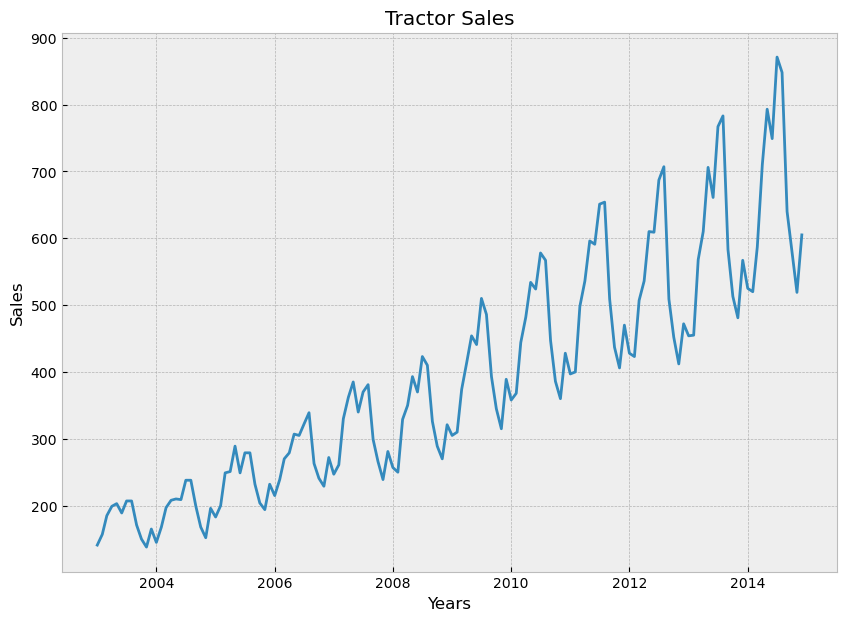

In [37]:
# plot the ts
plt.figure(figsize=(10,7))
plt.plot(tractor_ts)
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Tractor Sales')

In [38]:
#add rolling statistics like mean and SD for further analysis (smoothing)

rolmean = tractor_ts.rolling(window = 12).mean() #12 month rolling average for studing Trend
rolstd = tractor_ts.rolling(window = 12).std() # 12 month rolling std Devn for studing Variation

<function matplotlib.pyplot.show(close=None, block=None)>

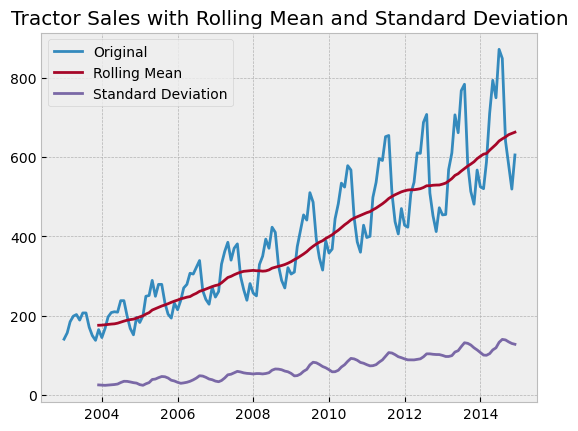

In [39]:
# plot all above on single chart

orig = plt.plot(tractor_ts, label = "Original")
mean = plt.plot(rolmean, label = "Rolling Mean")
std = plt.plot(rolstd, label = 'Standard Deviation')
plt.legend(loc = 'best')
plt.title('Tractor Sales with Rolling Mean and Standard Deviation')
plt.show

In [40]:
# analyse data year and month-wise; pivot table is good option for this data

monthly_tractor = pd.pivot_table(tractor, values = 'Tractor_Sales', columns = 'Year', index = 'Month')

In [41]:
monthly_tractor # index is out of order

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [42]:
monthly_tractor = monthly_tractor.reindex(index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [43]:
monthly_tractor

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


<Axes: xlabel='Month'>

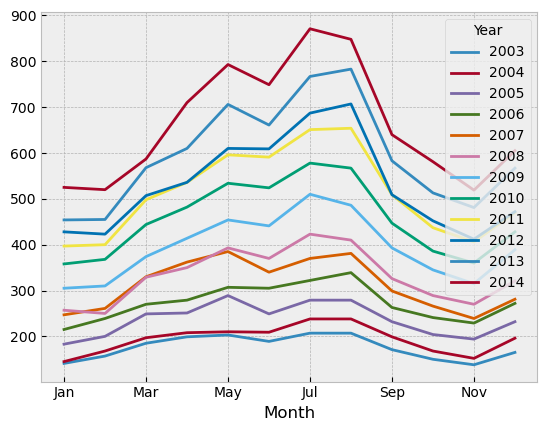

In [44]:
monthly_tractor.plot() ##movement on monthly basis annually. So lets pivot on month

In [45]:
annual_tractor = pd.pivot_table(tractor, values = 'Tractor_Sales', columns = 'Month', index = 'Year')

In [46]:
annual_tractor.head() # rearrange the sequence

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299


In [47]:
annual_tractor = annual_tractor[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [48]:
annual_tractor.head()

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281


<Axes: >

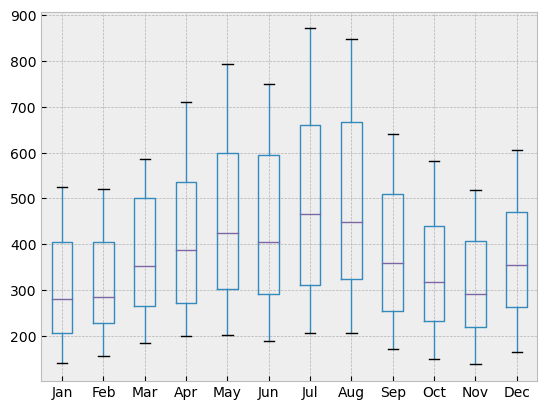

In [49]:
annual_tractor.boxplot()

# decompose ts

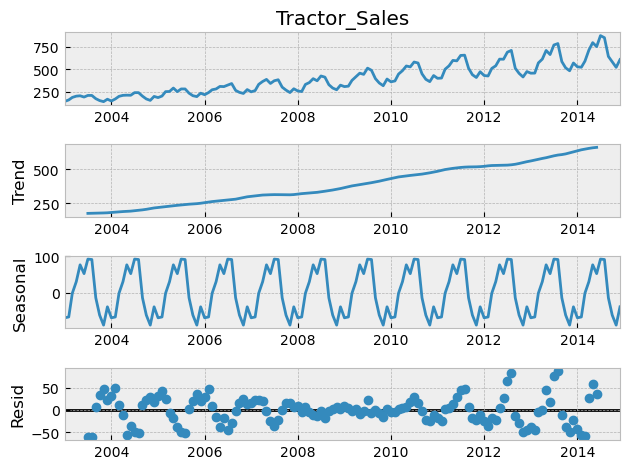

In [33]:
decomposition = sm.tsa.seasonal_decompose(tractor_ts, model = 'additive')
fig = decomposition.plot()

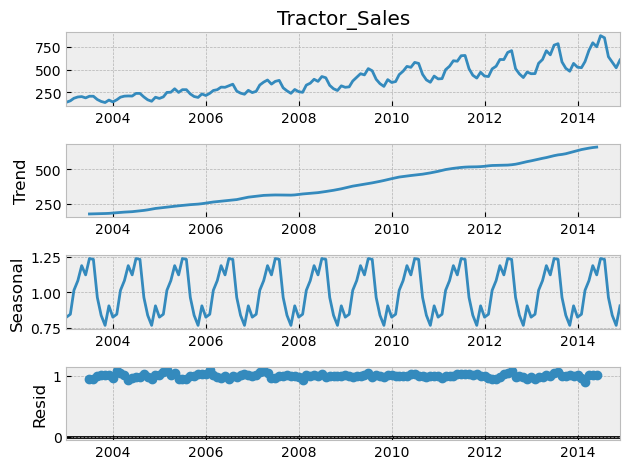

In [50]:
decomposition = sm.tsa.seasonal_decompose(tractor_ts, model = 'multiplicative')
fig = decomposition.plot()

# looks like a Multiplicative model since seasonal variation exist !
# also, looks like stationarity (for AR) and invertibility (for MA) exists in data

In [51]:
q = d = range(0,2)
p = range(0,4)

In [52]:
pdq = list(itertools.product(p,d,q))
#pdq

In [53]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1)]

In [54]:
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [55]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (3, 0, 0, 12),
 (3, 0, 1, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12)]

In [148]:
## simply to give you a flavor of how the various combinations can be printed !!

#print('Examples of parameter combination for seasonal ARIMA:')

In [56]:
warnings.filterwarnings('ignore')
AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(tractor_ts, order=param, seasonal_order=param_seasonal,
                                           enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX {} x {} - AIC :{}'.format(param, param_seasonal, results.aic), end = '\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [57]:
print('The smallest AIC is {} for model SARIMAX {} x {}'.format(min(AIC),
                                                            SARIMAX_model[AIC.index(min(AIC))][0],
                                                            SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 799.9064282668394 for model SARIMAX (3, 1, 0) x (3, 1, 1, 12)


In [58]:
mod_final = sm.tsa.statespace.SARIMAX(tractor_ts, order=SARIMAX_model[AIC.index(min(AIC))][0],
                                      seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                      enforce_stationarity=False, enforce_invertibility=False)

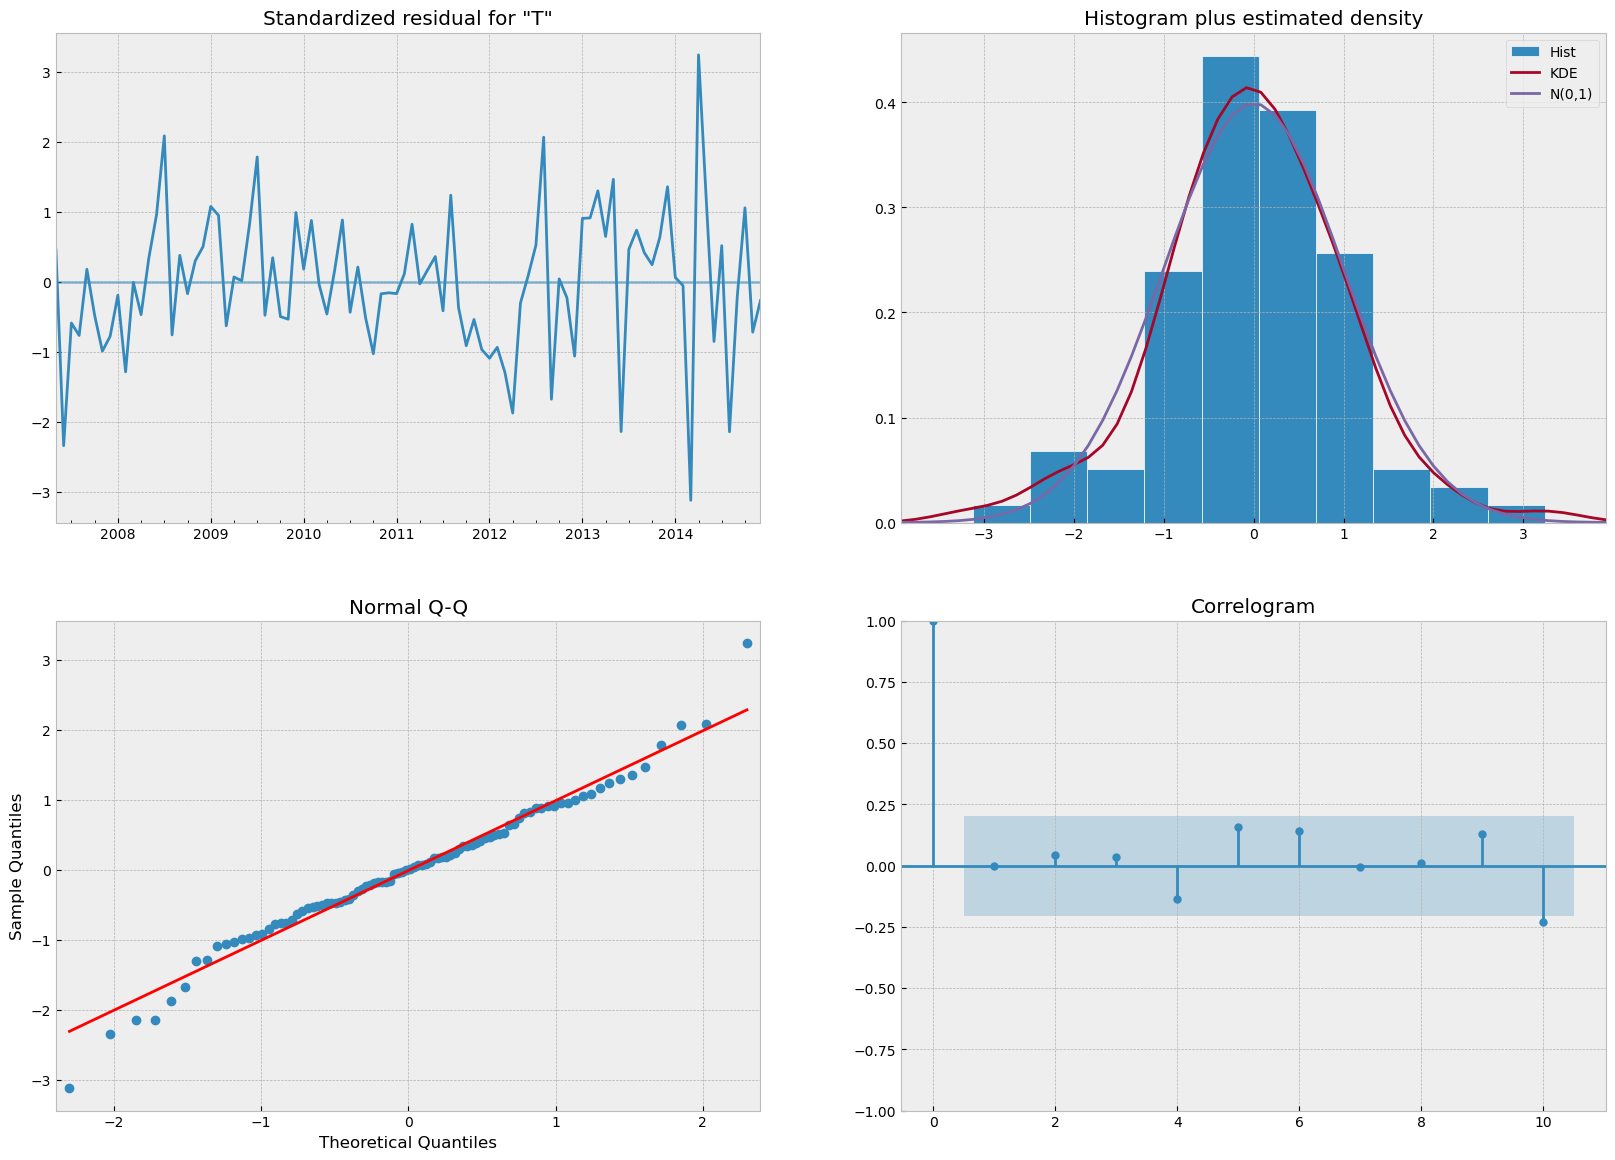

In [60]:
results = mod.fit()
results.plot_diagnostics(figsize = (20,14))
plt.show()

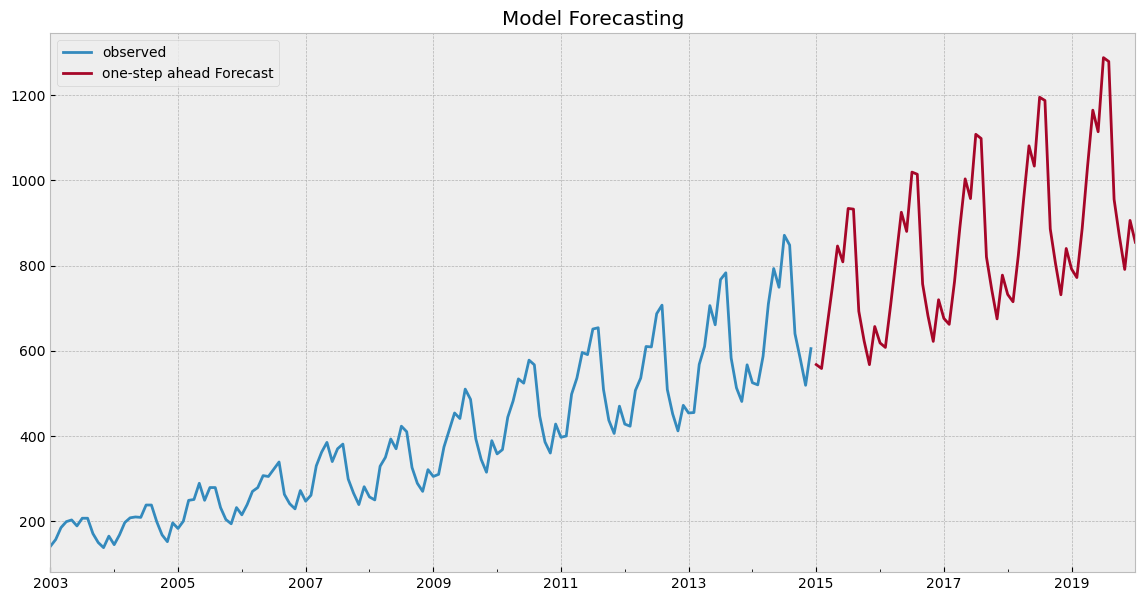

In [78]:
pred = results.get_prediction(start = pd.to_datetime('2015-01-01'),end = pd.to_datetime('2020-01-01'), dynamic = True)
ax = tractor_ts.plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'one-step ahead Forecast', lw = 2, alpha = 1, figsize = (14, 7))
plt.title('Model Forecasting')
plt.legend(loc='best')

# another way to use

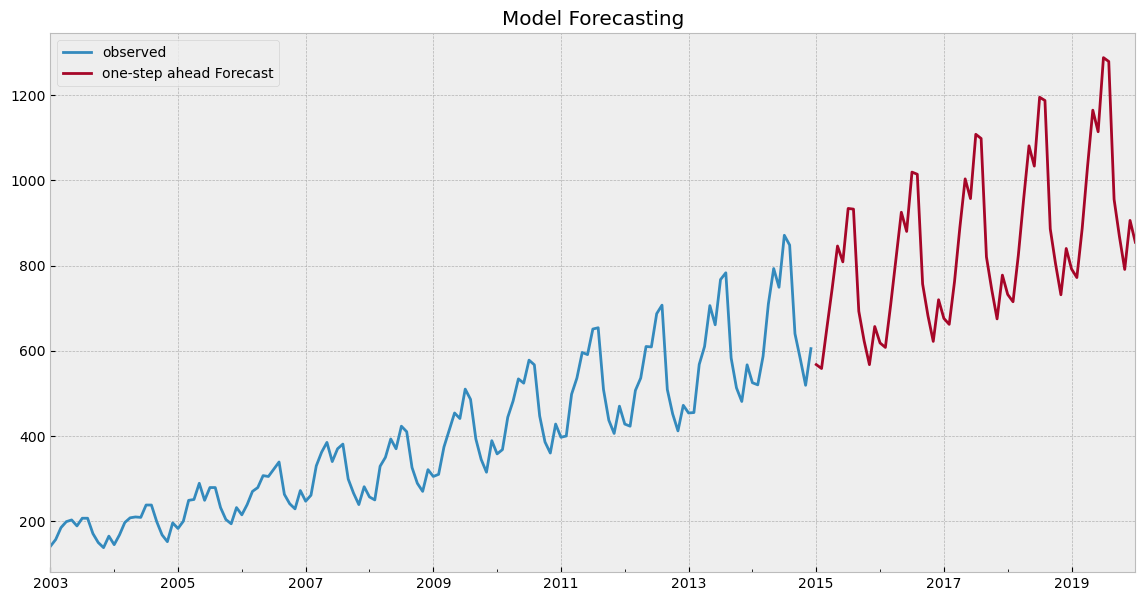

In [79]:
pred2 = results.get_forecast('2020-01-01')
ax = tractor_ts.plot(label = 'observed')
pred2.predicted_mean.plot(ax = ax, label = 'one-step ahead Forecast', lw = 2, alpha = 1, figsize = (14, 7))
plt.title('Model Forecasting')
plt.legend(loc='best')